In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_samples=5000,weights=[0.02, 0.98],
                           random_state=0,n_clusters_per_class=1)
ycount=pd.DataFrame(y)
print(ycount[0].value_counts())


1    4871
0     129
Name: 0, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [5]:
clf =RandomForestClassifier(max_depth=2,random_state=0).fit(X_train, y_train)
print("F1 Score is ", f1_score(y_test,clf.predict(X_test)))
print("Accuracy Score is ", accuracy_score(y_test,clf.predict(X_test)))

F1 Score is  0.9868287740628165
Accuracy Score is  0.974


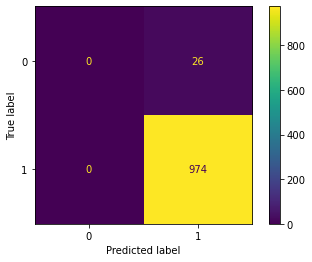

In [6]:
fig=plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [7]:
weighted_clf = RandomForestClassifier(max_depth=2, random_state=0,class_weight={0:38,1:1}).fit(X_train, y_train)
print("F1 Score for RandomForestClassifier with class_weight parameter is ", f1_score(y_test,weighted_clf.predict(X_test)))
print("Accuracy  Score for RandomForestClassifier with class_weight parameter is ", accuracy_score(y_test,weighted_clf.predict(X_test)))

F1 Score for RandomForestClassifier with class_weight parameter is  0.9928057553956834
Accuracy  Score for RandomForestClassifier with class_weight parameter is  0.986


In [8]:
ycount=pd.DataFrame(y_train)
print(ycount[0].value_counts())

1    3897
0     103
Name: 0, dtype: int64


In [9]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [10]:
brfc = BalancedRandomForestClassifier(n_estimators=500, random_state=0).fit(X_train,y_train)
print("F1 Score for Balanced Random Forest Classifier is ", f1_score(y_test,brfc.predict(X_test)))
print("Accuracy  Score for Balanced Random Forest Classifier is ", accuracy_score(y_test,brfc.predict(X_test)))

F1 Score for Balanced Random Forest Classifier is  0.9833852544132918
Accuracy  Score for Balanced Random Forest Classifier is  0.968


In [15]:
y = brfc.predict(X_test)

In [16]:
ycount=pd.DataFrame(y)
print(ycount[0].value_counts())

1    952
0     48
Name: 0, dtype: int64


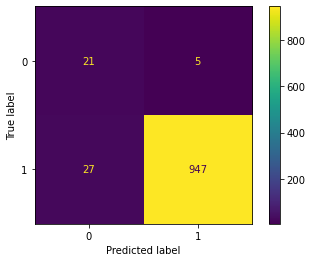

In [17]:
fig=plot_confusion_matrix(brfc, X_test, y_test)
plt.show()